### Recomendación de libro:

<img src="https://images-na.ssl-images-amazon.com/images/I/51FKg7ecS%2BL._SY344_BO1,204,203,200_.jpg" />

"How to lie with statistics" escrito por Darrell Huff en 1954, presenta una introducción a la estadística en general. Un libro muy sencillo de leer donde se explican los problemas básicos a los que se puede llegar interpretando resultados estadísticos y como estos pueden causarnos conclusiones incorrectas.

<img src="https://shrineodreams.files.wordpress.com/2013/01/huff2.jpg" width="50%" height="50%" />

# En estos tiempos los datos son baratos (fáciles de conseguir) pero el conocimiento es más difícil de conseguir

¡Por eso debemos saber de estadistica!

En esta semana nos concentraremos en dos herramientas clave para empezar a entender nuestros datos:

- Probabilidad: El estudio de eventos aleatorios. 
- Estadistica: Usar nuestros datos (que en muchos casos son muestras que representan poblaciones) para inferir caracteristicas de nuestas poblaciones.

¡A claro todo esto usando Python!

## Estadística Descriptiva

Empezar a entender mis datos. La estadistica descriptiva nos ayuda a recolectar, presentar y caracterizar un conjunto de datos

### Tomemos este ejemplo. Supongamos que queremos saber cuanto gana un trabajador en promedio dentro de una empresa.

### ¡¿Promedio?! 

<img src="https://shrineodreams.files.wordpress.com/2013/01/huff1.jpg" width="40%" height="40%" />

Ahora cargamos nuestro primer dataset a explorar. "Survival on the Titanic" 

https://www.kaggle.com/c/titanic

Predecir la supervivencia en el Titanic

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando de 1,502 a 2,224 pasajeros.
Una de las razones por las cuales se perdieron tantas vidas fue que no había suficientes botes salvavidas. Aunque hubo algún elemento de suerte involucrada en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y personas de la clase alta.

### Dataset

- survival: Survival (0 = No; 1 = Yes)
- pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of Siblings/Spouses Aboard
- parch: Number of Parents/Children Aboard
- ticket: Ticket Number
- fare: Passenger Fare
- cabin: Cabin
- embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### SPECIAL NOTES:
- Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  

The following are the definitions used for sibsp and parch.

- Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent: Mother or Father of Passenger Aboard Titanic
- Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.    

Some children travelledonly with a nanny, therefore parch=0 for them.  

As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [1]:
import pandas as pd
from __future__ import division

data = pd.read_csv('train.csv')

In [2]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Un enfoque estadístico

Existen 5 pasos para llegar a conclusiones correctas y extraer conocimiento de nuestros datos  sin caer en los problemas de prejuicios, tendencias y opiniones: 

- Recopilación de datos.
- Estadistica descriptiva: Generarár estadísticas que resuman los datos concisa.
- Analisis Exploratorio: Buscar patrones, diferencias, y otras características en nuestros datos.
- Pruebas de hipotesis: ¿Dónde vemos efectos aparentes?, ¿Existe diferencia entre dos grupos?, ¿El efecto es real o podría haber sucedido por casualidad?
- Estimación: Utilizar los datos de una muestra para estimar las características de la población general.

### Medidas de tendencia central:

### Media

Si se tiene una muestra de $n$ valores: $x_i$ 
La media $\mu$ es la suma de los valores dividido por el número de valores

$$ \mu = \frac{1}{n} \sum_{i}^{n} x_i $$

In [5]:
mean_age = data["Age"].mean()
mean_age

29.69911764705882

La media se encarga de describir la tendencia central de nuestros datos.
¡Importante!, esta media $\mu$ se usa para describir a una población completa.

### Mediana

 La mediana representa el valor de la variable de posición central en un conjunto de datos *ordenados*

In [6]:
import numpy as np

values = [1,2,3,4,5,6,7,8,9,10] # Par
values = pd.DataFrame(values)
print values.median()

values = [1,2,5,4,3,6,7,8,9] # Impar
values = pd.DataFrame(values)
print values.median()

0    5.5
dtype: float64
0    5.0
dtype: float64


In [7]:
median_age = data["Age"].median()
median_age

28.0

### Moda

La moda es el valor con mayor frecuencia en una distribución de datos.

In [8]:
mode_age = data["Age"].mode()
mode_age

0    24.0
dtype: float64

In [9]:
data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
19.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
23.00    15
34.00    15
33.00    15
20.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
28.50     2
40.50     2
63.00     2
13.00     2
10.00     2
45.50     2
70.00     2
30.50     2
71.00     2
59.00     2
57.00     2
55.00     2
0.75      2
64.00     2
23.50     1
14.50     1
0.67      1
53.00     1
0.92      1
0.42      1
70.50     1
36.50     1
80.00     1
66.00     1
74.00     1
12.00     1
55.50     1
34.50     1
24.50     1
20.50     1
Name: Age, dtype: int64

<img src="http://www.monografias.com/trabajos43/medidas-tendencia-central/mt19.gif" />

### Varianza

Otro valor estadístico que nos ayuda a entender nuestros datos es la Varianza. A diferencia de la media que describe la tendencia de en donde se centran nuestros datos, la varianza describe que tan lejos se encuentran los datos de la media.

$$ \sigma^2 = \frac{1}{n} \sum_{i}^{n} (x_i - \mu)^2 $$

In [10]:
variance_age = data['Age'].var()
variance_age

211.01912474630802

<img src="http://www.psychology.nottingham.ac.uk/staff/pal/stats/C82MST/C82MST%20Lecture%202a%20Notes_files/image011.gif" />

Espera... ¿Años al cuadrado?
La varianza es difícil de interpretar debido a las unidades.

Por suerte la desviación estándar es un estadístico más significativo.

### Desviación estándar

$$ \sigma =  \sqrt{\frac{1}{n} \sum_{i}^{n} (x_i - \mu)^2}  $$

In [11]:
std_age = data["Age"].std()
std_age

14.526497332334042

In [12]:
np.sqrt(variance_age)

14.526497332334042

¡Importante!, estas formulas para $\sigma^2$ y $\sigma$ se usan para describir a una población completa.

Si lidiamos con una muestra de N valores se usan estimadores, $\bar{x}$ y $S^2$

$$ \bar{x} = \frac{1}{N} \sum_{i}^{N} x_i $$

$$ S^2 = \frac{1}{N-1} \sum_{i}^{N} (x_i - \bar{x})^2 $$

https://maxwell.ict.griffith.edu.au/sso/biased_variance.pdf

## Distribuciones

La media, la varianza y la desviación estándar son estadísticos concisos, pero también peligrosos, ya que nublan la información que nos proporcionan los datos al reducirlos en un solo numero.

Un apoyo para entenderlos mejor es ver la **distribución** de los datos.

La representación más común de una distribución es un histograma, que describe frecuencia (el número de veces) con la que aparece cada valor.

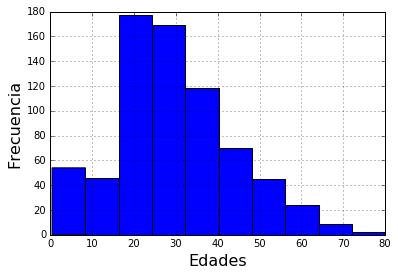

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

age = data[data.Age.notnull()]['Age']
age.hist(bins=10)
plt.xlabel('Edades', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)

In [23]:
help(plt.xlabel)

Help on function xlabel in module matplotlib.pyplot:

xlabel(s, *args, **kwargs)
    Set the *x* axis label of the current axis.
    
    Default override is::
    
      override = {
          'fontsize'            : 'small',
          'verticalalignment'   : 'top',
          'horizontalalignment' : 'center'
          }
    
    .. seealso::
    
        :func:`~matplotlib.pyplot.text`
            For information on how override and the optional args work



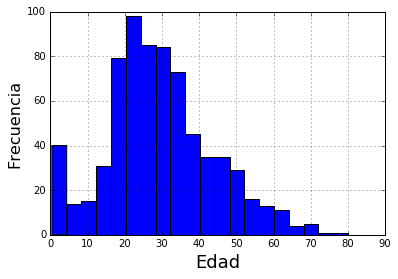

In [28]:
age.hist(bins=20)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

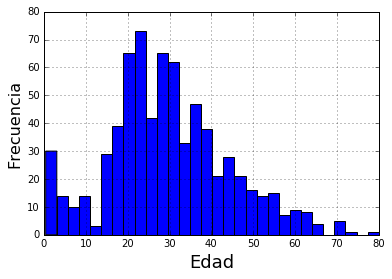

In [29]:
age.hist(bins=30)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

In [30]:
len(age.unique())

88

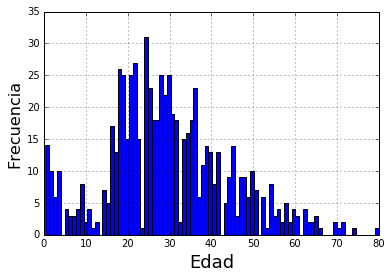

In [31]:
age.hist(bins=88)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

Los histogramas son útiles porque podemos revisar las siguientes características rápidamente:

- Moda: El valor más común o que más se repite en una distribución se llama moda.

- Forma: Alrededor de la moda podemos ver que la distribución es asimétrica.

- Los valores atípicos. (outliers)

### Función de probabilidad

Si queremos transformar las frecuencias a una función de probabilidad debemos dividir la serie entre el número de elementos

In [32]:
frequency = data[data.Age.notnull()]['Age'].value_counts()
frequency.head()

24.0    30
22.0    27
18.0    26
30.0    25
28.0    25
Name: Age, dtype: int64

In [33]:
pmf = frequency/len(data[data.Age.notnull()]['Age'])
pmf.head()

24.0    0.042017
22.0    0.037815
18.0    0.036415
30.0    0.035014
28.0    0.035014
Name: Age, dtype: float64

In [38]:
sum(pmf).round()

1.0

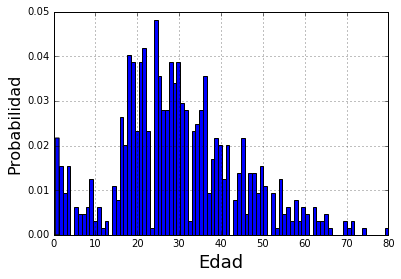

In [36]:
age.hist(bins=88, normed=True)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Probabilidad', fontsize=16)

$$ P(X = x) = f(x) $$

La función de probabilidad funciona bien si el número de valores es pequeño.

Pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace más pequeño.

Una alternativa es usar la función de distribución acumulada, pero antes.. debemos hablar de percentiles.

### Percentiles

Es una medida de tendencia central usada en estadística que indica, una vez ordenados los datos de menor a mayor, el valor de la variable por debajo del cual se encuentra un porcentaje dado de observaciones en un grupo de observaciones.

In [39]:
age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
age.quantile(0.20)

19.0

In [41]:
age.quantile(0.25)

20.125

In [42]:
age.quantile(0.99)

65.870000000000005

### Función de distribución acumulada

Ya que entendemos los percentiles, podemos mapear sus valores en una distribución.

De manera que obtenemos esto:

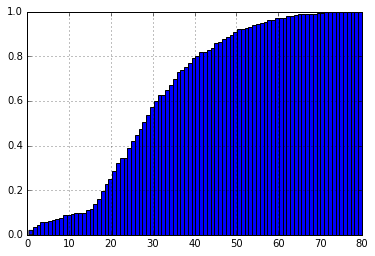

In [43]:
age.hist(cumulative=True, bins=88, normed=True)

$$ P(X \leq x) = f(x) $$

# ¿Y para qué nos sirve saber esto?

¡Pues ahora podemos empezar a calcular probabilidades de que ocurran eventos!

**Pero para esto debemos empezar y dar un repaso rapido a probabilidad**

### Probabilidad

Anteriormente mencionamos que la probabilidad es la frecuencia expresada como una fracción del tamaño de muestra.

Esa es una definición de probabilidad, pero no es la única y de hecho, el significado de probabilidad es un tema controversial.

Existe un consenso general de que la probabilidad es un valor real entre 0 y 1. Este valor pretende dar una medida cuantitativa que corresponde a la noción de que algunas cosas son más probables que otras.

$$ P(E) \epsilon [0,1] $$

Pierre Simón Laplace dijo:
>Probability ... is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.

In [44]:
def P(event, space):
    return (len(event & space) / float(len(space)))

<img src="http://www.gmdice.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/d/6/d6-standard-white.png" width="25%" height="25%" />

### Tirando un dado

In [45]:
D    = {1, 2, 3, 4, 5, 6}
even = {2, 4, 6}

P(even, D)

0.5

In [46]:
D    = {1, 2, 3, 4, 5, 6}
event = {6}

P(event, D)

0.16666666666666666

En el ejemplo anterior podemos ver que podemos derivar la probabilidad como casos de éxito entre numero de pruebas. Sin embargo que si queremos la probabilidad de algo que solo ocurre una vez la cosa se empieza a poner filosóficamente complicada y de aquí nacen varios tipos de "escuelas" los frecuentistas y los bayesianos. Mientras un frecuentista diría que carece de sentido asignar probabilidad por ejemplo a una elección presidencial, un bayesiano podría asignar una probabilidad o "likelihood" de que un candidato ganara basándose en experiencia y otros factores que pudieran afectar la elección.

### Reglas de probabilidad (Recordando a Kolmogorov)

- La probabilidad de que ocurra un evento es un valor entre 0 y 1. Para todo evento existe una probabilidad
$$ 0 \leq P(E) \leq 1 $$
- La probabilidad de que nada ocurra es 0
$$ P(\emptyset) = 0 $$
- La probabilidad de que algo ocurra es 1
$$ P(\Omega) = 1 $$
- La probabilidad de algo es 1 menos la probabilidad de lo contrario

# Ejercicio 1!

Encontrar la probabilidad de haber sobrevivido en el Titanic. (5 min)

In [ ]:
# Escribe to codigo y respuesta aqui

### Distribuciones continuas

Regresaremos a probabilidad en unos minutos mas.

Solamente hemos estado trabajando con la edad de las personas del Titanic, que es una variable discreta que ajustamos a una distribución empirica que representa una variable finita, pero ¿Qué hacer cuando tenemos variables continuas? ¿Cómo las represento en una distribución?. 

Pues cuando tenemos variables aleatorias continuas, usamos una distribución continua (Duh!)

<img src="./probfunc.png" />

https://en.wikipedia.org/wiki/List_of_probability_distributions

## Algunos ejemplos de distribuciones

### Distribución uniforme

Empezamos por la distribución más sencilla.

PDF:

$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/2000px-Uniform_Distribution_PDF_SVG.svg.png" width="35%" height="35%" />

In [49]:
s = np.random.uniform(-1,0,10000)

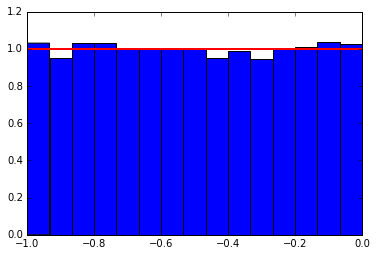

In [50]:
count, bins, ignored = plt.hist(s, 15, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

CDF:

$$ F(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b\end{cases}} $$

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/250px-Uniform_cdf.svg.png" width="35%" height="35%" />

### Distribución exponencial

La distribución exponencial es una de las ditribuciones más sencillas.

Podemos encontrarla en la vida diaria cuando observamos eventos y medidos el tiempo entre ellos. Por lo general si los eventos tienen la misma probabilidad de ocurrir la distribución de los tiempos tendran una forma exponencial. (Particle decay!)

$$ PDF = \lambda e^{-\lambda x}  $$

$$ CDF(x) = 1 − e^{−λx} $$

Donde:
$$ \mu = 1/\lambda $$

In [51]:
import math
lmbda = 0.05
space = np.linspace(1,100,100)

In [56]:
np.linspace(1,100,100)

array([   1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,
         10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,   18.,
         19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,   27.,
         28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,   36.,
         37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,   45.,
         46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,   54.,
         55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,   63.,
         64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,   72.,
         73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,   81.,
         82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,   90.,
         91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,   99.,  100.])

In [52]:
pdf = lmbda * np.exp(-lmbda * space)

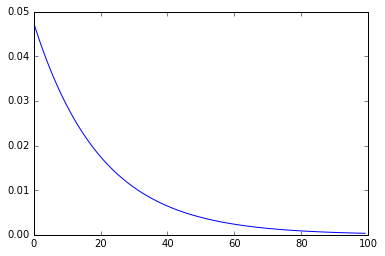

In [53]:
plt.plot(pdf)

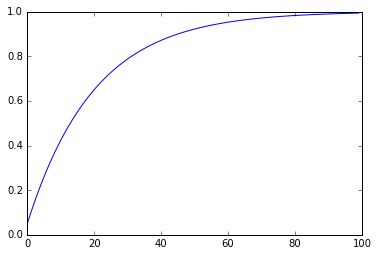

In [57]:
cdf =  1 -  np.exp(-lmbda * space)
plt.plot(cdf)

## Ejercicio 2!

vamos a tomar el ejemplo de radioactive decay. Sabemos que el carbono-14 (elemento que se usa para fechar) decae contra el nitrogeno-14 con una media de tiempo de 8267 años. Si T representa los años que tarde un atomo de C-14 en decaer contra N-14:

1.- Escribe y grafica una formula pdf que describa T:

In [58]:
lmbda = 1/float(8267)
space = np.linspace(1,18000,18000)

In [59]:
pdf = lmbda * np.exp(-lmbda * space)

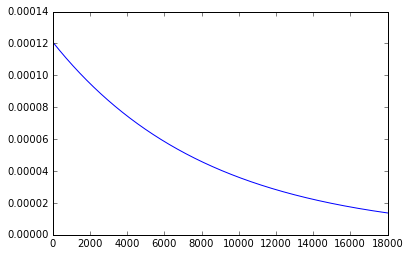

In [60]:
plt.plot(pdf)

2.- Trata de encontrar en cuantos años el atomo decae a la mitad! (A esto es lo que se refieren como vida media o "half life")

$$ P(X \leq x) = 0.5 $$
Para esto necesitarás la CDF! Puedes responder visualmente!

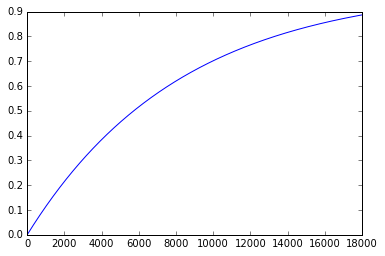

In [61]:
cdf =  1 -  np.exp(-lmbda * space)
plt.plot(cdf)

### Distribución normal

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/2000px-Standard_deviation_diagram.svg.png" width="50%" height="50%">

La distribución normal (Gaussiana), es una de las distribuciones de probabilidad que con más frecuencia aparece aproximada en fenómenos reales.

$$ P(x, \sigma, \mu) = \frac{1}{\sigma\sqrt{2 \pi}}e^{-(x -\mu)^2/2\sigma^2}$$

In [66]:
np.random.randn(1)

array([-1.11682933])

In [68]:
help(np.random.randn)

Help on built-in function randn:

randn(...)
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
  

(array([ 0.00433765,  0.00722942,  0.00289177,  0.00578353,  0.0086753 ,
         0.01012118,  0.02168825,  0.04482237,  0.04193061,  0.03614708,
         0.05060591,  0.08386122,  0.111333  ,  0.12723771,  0.13012948,
         0.15181772,  0.20386951,  0.26893425,  0.29351426,  0.34267428,
         0.3672543 ,  0.39906372,  0.39038843,  0.42075197,  0.36870018,
         0.38460489,  0.37014606,  0.32532369,  0.33110722,  0.31664839,
         0.26315072,  0.26893425,  0.23278717,  0.17495185,  0.17350597,
         0.11711653,  0.11856241,  0.05494356,  0.06217297,  0.03614708,
         0.03614708,  0.01301295,  0.0260259 ,  0.01879648,  0.00722942,
         0.        ,  0.        ,  0.00289177,  0.        ,  0.00144588]),
 array([-3.39178477, -3.253461  , -3.11513723, -2.97681345, -2.83848968,
        -2.70016591, -2.56184213, -2.42351836, -2.28519459, -2.14687081,
        -2.00854704, -1.87022327, -1.73189949, -1.59357572, -1.45525195,
        -1.31692817, -1.1786044 , -1.04028063, -0

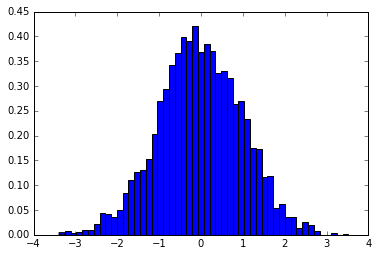

In [63]:
import numpy as np
x = np.random.randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True)

### ¿Por qué usar distribuciones continuas?

Como todos los modelos, las distribuciones continuas son abstracciones, lo que significa que pueden simplificar y deshacerse de los detalles que se consideran irrelevantes (Errores de medición, outliers).

Además son una forma de comprimir los datos. Ya que si logramos ajustar un modelo a un conjunto de datos, un pequeño conjunto de parámetros puede resumir una gran cantidad de datos.

### ¿Por qué es tan importante la distribución Normal?

El teorema de límite central establece que la media de la muestra $\bar{X}$ sigue una distribución normal (para $n$ grandes)
con media $\mu$ y desviación estándar $\frac{\sigma}{\sqrt(n)}$

El teorema del límite central explica, porque aparece con tanta frecuencia la distribución normal en el mundo natural.

La mayoría de las características de los animales y otras formas de vida se ven afectadas por un gran número de variables genéticas y ambientales cuyo efecto es aditivo.

Las características que medimos son la suma de un gran número de pequeños efectos, por lo que su distribución tiende a ser normal.

¿Se acuerdan de nuestra variable aleatoria para la edad de un pasajero en el Titanic? ¿No? pues aqui va de nuevo:

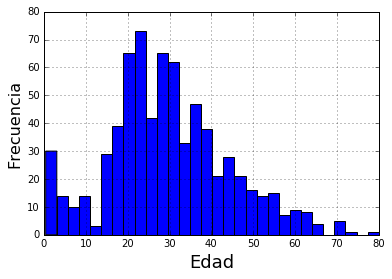

In [69]:
age.hist(bins=30)
plt.xlabel('Edad', fontsize=18)
plt.ylabel('Frecuencia', fontsize=16)

No parece tener una distribución normal, ¿Pero que si empezamos a hacer una distribución para su media aritmetica haciendo un re-sampling?

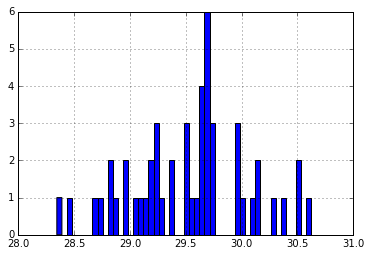

In [70]:
#Prueba para el Teorema de Limite Central usando 50
media_muestra = [] #Iniciamos una lista

for x in range(0, 50):
    media_muestra.append(np.mean(age.sample(n=300))) 

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins=50)

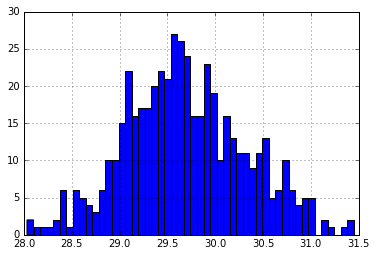

In [71]:
#Prueba para el Teorema de Limite Central usando 500
media_muestra = []

for x in range(0, 500):
    media_muestra.append(np.mean(age.sample(n=300)))

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins = 50)

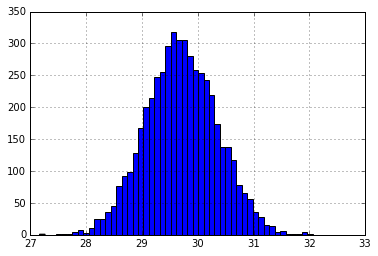

In [72]:
#Prueba para el Teorema de Limite Central usando 5000
media_muestra = []

for x in range(0, 5000):
    media_muestra.append(np.mean(age.sample(n=300)))

media_muestra = pd.Series(media_muestra)
media_muestra.hist(bins = 50)

¡Este teorema transformo la estadistica por completo!

¿Por qué? 

Pues básicamente nos dice que no importa que distribución tengan los datos, la distribución para la media de la muestra sigue una distribución normal!, (siempre y cuando la muestra sea grande claro, como vimos en el ejemplo anterior). Y como los estadísticos nos sentimos muy cómodos trabajando con la distribución normal, este teorema facilita de gran manera nuestros análisis.

### Probabilidad condicional

$$ P(A \cap B) = P(A) P(B) $$ ¡Cuidado! ¡No siempre es cierto! Solo si son evento independientes

<img src="https://imgs.xkcd.com/comics/conditional_risk.png" width="50%" height="50%" />

<img src="https://dr282zn36sxxg.cloudfront.net/datastreams/f-d%3Aa499b7d235ca3fade0f77b770bf4869fc84f7bb690ff64f2e01162cb%2BIMAGE%2BIMAGE.1" width="40%" height="40%"/>

Suficiente estadistica, de vuelta a probabilidad

$$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

Si A y B son eventos independientes entonces:

$$ P(A | B) = \frac{P(A) P(B)}{P(B)}  = P(A) $$

Algunos ejercicos para practicar y entender mejor la probabilidad condicional:
http://www.mathgoodies.com/lessons/vol6/conditional.html

#### Monty Hall

¡Con este ejemplo debe quedar más que claro!

https://www.youtube.com/watch?v=mhlc7peGlGg

¿Y a donde vamos con esto de probabilidad condicional? Pues a un tema muy importante, ¿Recuerdan que al principio vimos 2 escuelas de probabilidad? Los frecuentistas y los bayesianos. Los frecuentistas decían que no tiene sentido hablar de probabilidad si no tenemos eventos que se repitan en la mismas condiciones, sin embargo los bayesianos tratan de asignarle "likelihood" de que un evento suceda, usando probabilidad condicional!

### Regla de Bayes

El teorema de Bayes es a menudo interpretado como una declaración acerca de cómo la evidencia, E, afecta la probabilidad de una hipótesis, H:

$$P(H | E) = P(H) \frac{P(E|H)}{P(E)}$$

En palabras, esta ecuación dice que la probabilidad de H después de haber visto E es el producto de $P(H)$, que es la probabilidad de que H antes de ver la evidencia E, y la relación de $P(E|H)$, la probabilidad de ver la evidencia suponiendo que H es verdadera, y $P(E)$, la probabilidad de ver la evidencia bajo cualquier circunstancia.

Ejemplo: Filtro de Spam

$$ P(S|W) = \frac{P(W|S) \cdot P(S)}{P(W|S) \cdot P(S) + P(W|H) \cdot P(H)} $$

donde:

- $P(S|W)$ Es la probabilidad de que nuestro mensaje sea SPAM, sabiendo que encontramos la palabra "Dinero"
- $P(S)$ Es la probabilidad de que cualquier mensaje sea SPAM
- $P(W|S)$ La probabilidad de que nuestra palabra aparezca en mensajes de SPAM
- $P(H)$ La probabilidad de que nuestro mensaje sea HAM
- $P(W|H)$ La probabilidad de que la nuestra palabra aparezca en HAM


¡Tranquilos! Es un tema complicado, así que veamos un ejercicio

> The blue M&M was introduced in 1995. Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan). Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996. He won't tell me which is which, but he gives me one M&M from each bag. One is yellow and one is green. What is the probability that the yellow M&M came from the 1994 bag?

¿Complicado no? Y si lo es, requiere muchos calculos para contestarse pero Bayes nos permite atacar el problema de una forma distinta.

A: first M&M from 94 bag, second from 96 bag  
B: first M&M from 96 bag, second from 94 bag  
P(A) = P(B) = 0.5

Se nos presenta algo de evidencia E:  
E: first M&M yellow, second green

Nuestra pregunta es:
$$ P(A|E) = x $$

Bayes no dice que:
$$ P(A | E) = \frac{P(E | A) P(A)}{P(E)} $$

$$ P(E|A) = 0.20 * 0.20  = 0.04 $$
$$ P(E|B) = 0.10 * 0.14 = 0.014 $$
$$ P(A) = 0.5 $$  
$$ P(B) = 0.5 $$
$$ P(E) = P(E|A) * P(A) + P(E|B) * P(B) = 0.04 * 0.5 + 0.014 * 0.5 = 0.027 $$

Ahora solo debemos calcular P(A|E)

# Pruebas de Hipotesis

Al igual que en la ciencia en la estadistica tratamos de probar a desmentir una hipotesis usando evidencia.

En estadistica decimo que un efecto es **estadisticamente significativo** si logramos probar o tener suficiente evidencia de queeste no pudo haber ocurrido por casualidad

Existen 3 elementos basicos que nos ayudaran a contestar la pregunta anterior:
- Hipótesis nula: La hipotesis que queremos desmentir
- p-value: La probabilidad del efecto aparente (contrario a efecto significativo) bajo la hipotesis nula
- Interpretación: Conclusión usando el p-value de si el efecto es significativo o no.

## Ejemplo

Un fabricante afirma que el espesor del chicle de menta que produce es de 7.5 centésimas de pulgada. Un especialista en control de calidad comprueba regularmente esta afirmación. En una serie de producción, se tomó una muestra aleatoria de $n = 10$ piezas de goma y se mide su espesor. El Obtuvo:

7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50

El especialista en control de calidad tiene dos hipotesis:
La hipotesis nula es que el chicle que produce 7.5 centésimas de pulgada, y la hipotesis alternativa es que la media del espesor es diferente de 7.5 centésimas de pulgada.

H0 : μ = 7.5  
HA : μ ≠ 7.5

In [73]:
espesor = np.array([7.65, 7.60, 7.65, 7.70, 7.55, 7.55, 7.40, 7.40, 7.50, 7.50])

In [74]:
espesor.mean()

7.5499999999999998

¿Es suficiente esto para desmentir la hipotesis nula?

¡NO!

¡Necesitamos diseñar una prueba!

<img src="http://i0.wp.com/www.medical-institution.com/wp-content/uploads/2014/08/What-is-p-value-biostatistics-Medical-Institution.png" />

Para este ejemplo el p-value es 0.158

## Covarianza

Covarianza es una medida de la tendencia de dos variables para variar juntas  
Si tenemos dos series, X y Y, sus desviaciones de la media son:

$$ dx_i = x_i - \mu_X $$
$$ dy_i = y_i - \mu_Y $$

Si las multiplicamos, el producto es positivo cuando las desviaciones tienen el mismo signo y negativo cuando tienen el signo opuesto. 

Asi que la suma de los productos da una medida de la tendencia a variar juntos.  

Covarianza es la media de estos productos:
$$ Cov(X, Y) = \frac{1}{n} \sum dx_i dy_i$$

donde $n$ es la longitud de las dos series (que tienen que tener la misma longitud).

La Covarianza es útil en algunos cálculos, pero rara vez se reporta como un estadístico debido a que es difícil de interpretar debido al resultados de las dimensiones (por ejemplo metro*kilo)

In [75]:
data.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


## Correlación

La correolación hace frente a ese problema al dividir entre sus desviaciones estandar.

$$ \rho = \frac{Cov(X,Y)}{\sigma_x \sigma_y}  $$

Este valor se llama "Pearson’s correlation" y es más fácil de interprtar pues toma valores de entre -1 y 1

In [76]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png" />

## Correlación no implica causalidad

En general, una relación entre dos variables no asegura si uno causa el otro, o al revés, o ambos, o si
pueden ser causados por algo completamente distinto.

http://www.tylervigen.com/spurious-correlations

<img src="http://imgs.xkcd.com/comics/correlation.png" />

# Respuesta ejercicios:

### Ejercicio 1:

In [47]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
342 / float(549 + 342)

0.3838383838383838

### Ejercicio 2:

In [ ]:
lmbda= 1/float(8267)
space = np.linspace(1,18000,18000)

In [ ]:
lmbda

In [ ]:
pdf = lmbda * np.exp(-lmbda * space)

In [ ]:
plt.plot(pdf)

In [ ]:
cdf =  1 -  np.exp(-lmbda * space)
plt.plot(cdf)

In [62]:
cdf[5730]

0.50004549559005551